In [1]:
import requests
import base64
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
from typing import Tuple

In [2]:
def visualize_iamge(image_b64):
    if image_b64.startswith("data:"):
        image_b64 = image_b64.split(",")[1]
    image_bytes = base64.b64decode(image_b64)
    image = Image.open(BytesIO(image_bytes))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

def get_base64_encoded_image(image_url: str) -> Tuple[str, str]:
    """
    Fetch an image from a URL and return its base64 encoding and media type.

    Args:
        image_url: URL of the image.

    Returns:
        Tuple of (base64 string, media type, e.g., 'image/png', 'image/jpeg').
    """
    response = requests.get(image_url)
    response.raise_for_status()
    
    # Get media type from response headers
    media_type = response.headers.get("Content-Type", "application/octet-stream")
    
    # Encode image to base64
    image_data = response.content
    base64_image = base64.b64encode(image_data).decode("utf-8")
    
    # Optional sanity check
    assert base64.b64decode(base64_image) == image_data
    
    return base64_image, media_type


In [3]:
instructions = ["میتونی دراور چهار کشو (کد D14) رو بهم کمک کنی پیدا کنم؟",
                'کمترین قیمت ست سطل و جای دستمال لالیپاپ مدل رنگین کمان چنده؟',
                "لطفاً دراور چهار کشو (کد D14) را برای من تهیه کنید.",
                "عرض پارچه تریکو جودون 1/30 لاکرا گردباف نوریس به رنگ زرد طلایی چقدر است؟",
                "کمترین قیمت در این پایه برای گیاه طبیعی بلک گلد بنسای نارگل کد ۰۱۰۸ چقدر است؟",
                "کدام یک از این ماگ‌های خرید ماگ-لیوان هندوانه فانتزی و کارتونی کد 1375 یا ماگ لته خوری سرامیکی با زیره کد 741 دارای سبک کارتونی و فانتزی بوده و برای کودکان یا نوجوانان مناسب‌تر است؟",
                "قیمت متوسط خردکن سیلور کرست مدل NF-1923 تیغه تیتانیومی در شهر قم چقدر است؟",
                """محصول \'لحاف کرسی دست دوز ترمه طرح نسترن رنگ زرشکی\' با شناسه "iushix" و \'لحاف کرسی دست دوز ترمه آبی طرح نسترن کد 119807 Lahaf\' از نظر در دسترس بودن گارانتی در شهرهای مختلف را مقایسه کنید. کدام یک گزینه بهتری است؟""",
                "من به پایه دیواری مدلی برایت F3010 که مناسب تلویزیون\u200cهای سایز ۱۷ تا ۵۵ اینچ باشد، نیاز دارم.'",
                "سلام. لطفاً پاف نیمکت انتظار سه نفره با ستون\u200cبندی اسفنج مبلی و رنگ\u200cبندی مختلف را که امکان ارسال به سراسر ایران دارد، برای من تهیه کنید. متشکرم.",
                'میز جلو مبلی اسمردیس مدل J131 از چه موادی ساخته شده است؟',
                'لطفاً درباره ظرفیت ماگ سرامیکی دسته رنگی طرح نشانگر سوخت – Coffee Fuel Gauge – اطلاعات بیشتری بدهید و بفرمایید که این ماگ چه ظرفیتی دارد؟',
                # 'سلام! من دنبال یه گیاه بونسای هستم که خیلی خاص و زیبا باشه. می\u200cخوام برای هدیه دادن استفاده کنم و بهتره که ارسال گل رایگان هم داشته باشه. قیمتش هم حدوداً بین ۳,۷۰۰,۰۰۰ تا ۴,۱۰۰,۰۰۰ تومان باشه. می\u200cتونید کمکم کنید؟',
                'در مقایسه بین "چرخ خیاطی ژانومه دیجیتال (۱۲مدل دوخت) جا دکمه اتومات مدلSchone" و "چرخ خیاطی ژانومه مدل Juki 9800 اتوماتیک" کدامیک از نظر قیمت متوسط در مشهد بهتر است؟',

                'سلام، من به دنبال خرید ساعت دیواری مدرن فلزی سایز 60 مدل 122 هستم. (پس کرایه) اگر موجود دارید لطفا راهنمایی کنید. ممنون.',
                'قیمت متوسط چای ساز بوش مدل PB-78TS ظرفیت ۲.۵ لیتر با کتری پیرکس در شهر قم چقدر است؟',
                'آیا میز بار DBP99 از چه جنسی ساخته شده است؟',
                'در مقایسه بین "چرخ خیاطی ژانومه دیجیتال (۱۲مدل دوخت) جا دکمه اتومات مدلSchone" و "چرخ خیاطی ژانومه مدل Juki 9800 اتوماتیک" کدامیک از نظر قیمت متوسط در مشهد بهتر است؟',
                'کدامیک از محصولات \'دراور فایل کمدی پلاستیکی طرح کودک\' با شناسه "ebolgl" و \'دراور هوم کت ۴ طبقه بزرگ طرح دار از پلاستیک\' با شناسه "nihvhq" در فروشگاه\u200cهای بیشتری موجود است و آسان\u200cتر می\u200cتوان آن را خرید؟',
                'متوسط قیمت پکیج دیواری لورچ مدل آدنا ظرفیت ۳۲ هزار چقدر است؟',
                'غذاساز کنوود مدل FDP65: این محصول چند عضو دارد؟',               
]
# chat_id = "retrieve_similar"

def request_chat(x, image_url=None, chat_id = 'mytest'):

    url = "https://behnam-torob-ai-shopping-assistant.darkube.app/chat"
    messages = [{"type": "text", "content":  x}]
    if image_url:
        image = get_base64_encoded_image(image_url=image_url)
        messages.append({"type": "image", "content": image})
    data = {
        "chat_id": chat_id,
        "messages": messages,
    }

    # Disable system proxy
    resp = requests.post(url, json=data, proxies={"http": None, "https": None})
    return resp.json()

In [102]:
for x in instructions:
    print(request_chat(x))

{'message': 'دراور چهار کشو (کد D14) را پیدا کردم و می\u200cتوانم اطلاعات ان را برای شما فراهم کنم.', 'base_random_keys': ['bmubxu'], 'member_random_keys': None}
{'message': '980000.000', 'base_random_keys': ['rtxrky'], 'member_random_keys': None}
{'message': 'دراور چهار کشو (کد D14) برای شما یافت شد.', 'base_random_keys': ['bmubxu'], 'member_random_keys': None}
{'message': '1.18 متر', 'base_random_keys': ['twffbf'], 'member_random_keys': None}
{'message': '275000', 'base_random_keys': ['wmkpoc'], 'member_random_keys': None}
{'message': 'محصول "خرید ماگ-لیوان هندوانه فانتزی و کارتونی کد 1375" به دلیل داشتن نام شامل عبارت "فانتزی و کارتونی" و سبک مناسب برای کودکان و نوجوانان، گزینه مناسب\u200cتری است نسبت به "ماگ لته خوری سرامیکی با زیره کد 741" که سبک کارتونی و فانتزی ندارد.', 'base_random_keys': ['hhtgaa'], 'member_random_keys': None}
{'message': '1850000.000', 'base_random_keys': ['xauhns'], 'member_random_keys': None}
{'message': "محصول 'لحاف کرسی دست دوز ترمه ابی طرح نسترن کد 11980

In [103]:
request_chat("سلام میتونی بهم کمک کنی؟", "chat_testv4")

{'message': 'سلام! خوشحال می\u200cشوم کمکتان کنم. لطفاً بگویید دنبال چه محصولی هستید یا چه ویژگی\u200cهایی برایتان مهم است؟ (مثلاً محدوده قیمت، شهر، برند، گارانتی، امتیاز فروشنده و غیره)',
 'base_random_keys': None,
 'member_random_keys': None}

In [104]:
request_chat("دنبال یه ماگ لیوانی میگردم که استایل فانتزی داشته باشه و قیمتش حداکثر 200 باشه . فروشگاه تو تهران دلشته باشه.", "chat_testv4")

{'message': 'چند فروشگاه در تهران محصول ماگ با قیمت حداکثر 200 هزار تومان دارند. سه پیشنهاد برای شما:\n1. ماگ سرامیکی زیبا مدل Time کد 1030 - قیمت 195000 تومان - فروشگاه با امتیاز 5.0\n2. ماگ پیرکس گود مورنینگ ظرفیت ۰.۳۵ لیتر تپل - قیمت 195000 تومان - فروشگاه با امتیاز 5.0\n3. ماگ پیرکس گود مورنینگ ظرفیت ۰.۳۵ لیتر تپل - قیمت 185000 تومان - فروشگاه با امتیاز 5.0\nلطفاً بگویید چه ویژگی\u200cهای بیشتری برایتان مهم است (مثلاً برند، گارانتی، رنگ، یا چیزهای دیگر) تا بتوانم بهتر راهنمایی کنم.',
 'base_random_keys': None,
 'member_random_keys': None}

In [105]:
request_chat("گارانتی یا برند مهم نیست. رنگش قرمز باشه", "chat_testv4")

{'message': 'متأسفانه در حال حاضر ماگ قرمز رنگ با قیمت حداکثر 200 هزار تومان در فروشگاه\u200cهای تهران موجود نیست. اگر مایل باشید می\u200cتوانم پیشنهادهای دیگری با رنگ یا قیمت متفاوت ارائه دهم.',
 'base_random_keys': None,
 'member_random_keys': None}

In [106]:
request_chat("پس یه دونه به انتخاب خودت پیشنهاد بده.", "chat_testv4")

{'message': 'یک ماگ با طرح حیوانات مدل گاو در فروشگاهی در تهران با قیمت 200000 تومان موجود است. این محصول رنگ قرمز ندارد اما نزدیک\u200cترین گزینه به درخواست شما است. فروشگاه امتیاز 5.0 دارد و گارانتی ندارد.',
 'base_random_keys': None,
 'member_random_keys': None}

In [107]:
request_chat("اینو نمیخوام ولی دستت درد نکنه", "chat_testv4")

{'message': 'ممنون از شما. اگر در آینده به کمک نیاز داشتید، خوشحال می\u200cشوم دوباره کمکتان کنم. روز خوبی داشته باشید!',
 'base_random_keys': None,
 'member_random_keys': None}

In [4]:
import os, sys
sys.path.append(os.path.abspath(".."))
from pydantic import BaseModel
from pydantic_ai import Agent, UsageLimits, ModelSettings
from pydantic_ai.models.openai import OpenAIChatModel
from pydantic_ai.providers.openai import OpenAIProvider
from prompt.prompts import image_label_system_prompt
from typing import List, Optional, Tuple, Dict, Any

import httpx
OPENAI_API_KEY = os.getenv("API_KEY")
BASE_URL = os.getenv("BASE_URL")  # e.g. https://turbo.torob.com/v1
MODEL = os.getenv("SHOPPING_MODEL")


# --- Output Schema ---
class ImageResponse(BaseModel):
    description: Optional[str] = None
    long_description: Optional[str] = None
    candidates: Optional[List[str]] = None
    main_topic: Optional[str] = None

# --- Agent ---

import pickle
with open("../categories_by_level.pkl", "rb") as f:
    loaded_levels = pickle.load(f)

# for lvl, cats in loaded_levels.items():
#     print(f"Level {lvl}:", cats[:10], "...")  # show first 10 per level
labels_quotes = [f"Level {lvl}: {cats}" "\n" for lvl,cats in loaded_levels.items()]

image_client = OpenAIChatModel(
    MODEL,
    provider=OpenAIProvider(
        base_url=BASE_URL,
        api_key=OPENAI_API_KEY,
        http_client=httpx.AsyncClient()
    ),
    settings=ModelSettings(temperature=0.0001, max_tokens=1024)
)

image_agent = Agent(
    name="TorobImageAssistant",
    model=image_client,
    system_prompt=image_label_system_prompt + "\n" + "\n".join(labels_quotes),
    output_type=ImageResponse,
)

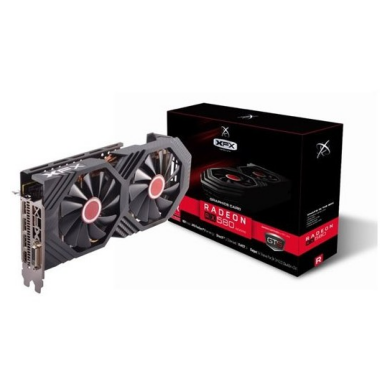

In [12]:
image_url = "https://image.torob.com/base/images/h4/Nb/h4NbD5PFF4C7bZW1.jpg"
text_input = "شیء و مفهوم اصلی در تصویر چیست؟"
image, media_type = get_base64_encoded_image(image_url)
visualize_iamge(image)

In [9]:
from pydantic_ai import Agent, BinaryContent
# Decode base64 for BinaryContent
image_bytes = base64.b64decode(image)

# Text instruction
instruction = "مفهوم و موضوع اصلی تصویر چیست؟"

# Run the agent synchronously with text + image
result = await image_agent.run(
    [
        instruction,
        BinaryContent(data=image_bytes, media_type=media_type),
    ]
)

# Print structured output
print("Agent output:", result.output)

Agent output: description='کارت گرافیک Radeon RX 580 به همراه جعبه آن' long_description='تصویر یک کارت گرافیک مدل Radeon RX 580 از برند XFX را نشان می\u200cدهد که در کنار جعبه محصول قرار دارد. کارت گرافیک دارای دو فن خنک\u200cکننده بزرگ است و برای استفاده در کامپیوترهای شخصی جهت پردازش گرافیکی و بازی\u200cهای رایانه\u200cای طراحی شده است.' candidates=['کارت گرافیک', 'لوازم جانبی کامپیوتر', 'قطعات کامپیوتر'] main_topic='کارت گرافیک'


In [10]:
print(result.output.main_topic)

کارت گرافیک


In [118]:
print(request_chat(x=text_input, image_url=image_url))

{'message': '-- ERROR: tuple indices must be integers or slices, not str', 'base_random_keys': None, 'member_random_keys': None}
